In [1]:
import os
import re
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from sklearn import model_selection
from math import log
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Assigning integer value to every class. 
classes = os.listdir('20_newsgroups/') # '20_newsgroups/' is the path for folder containing all thee files.
classes_dict = {}
for i in range(20):
    classes_dict[classes[i]] = i
print(classes_dict)

{'alt.atheism': 0, 'comp.graphics': 1, 'comp.os.ms-windows.misc': 2, 'comp.sys.ibm.pc.hardware': 3, 'comp.sys.mac.hardware': 4, 'comp.windows.x': 5, 'misc.forsale': 6, 'rec.autos': 7, 'rec.motorcycles': 8, 'rec.sport.baseball': 9, 'rec.sport.hockey': 10, 'sci.crypt': 11, 'sci.electronics': 12, 'sci.med': 13, 'sci.space': 14, 'soc.religion.christian': 15, 'talk.politics.guns': 16, 'talk.politics.mideast': 17, 'talk.politics.misc': 18, 'talk.religion.misc': 19}


In [3]:
def splitter(): #Splits the files for training and testing data
    ng  = os.listdir('20_newsgroups/')
    x_train = np.array([])
    y_train = x_train
    x_test = y_train
    y_test = y_train
    for gp in ng:
        files = np.array(os.listdir('20_newsgroups/'+gp))
        y = np.array([gp]*len(files))
        x1,x2,y1,y2 = model_selection.train_test_split(files,y,random_state=1)
        x_train = np.append(x_train,x1)
        x_test = np.append(x_test,x2)
        y_train = np.append(y_train,y1)
        y_test = np.append(y_test,y2)
    return x_train,x_test,y_train,y_test #We have randomly chosen 25% of files from every class/Newsgroups
                                         #for testing data and 75% for training.

In [4]:
x_train,x_test,y_train,y_test = splitter() # x_train has names of files chosen for training and y_train has name of their 
# classes same goes for x_test and y_test.

In [5]:
def cleanser(data):# Returns the passed string after removing punctuations.
    pattern = re.compile(r'([^\w\s]|_)')
    c_data = pattern.sub(' ',data)
    return c_data

In [6]:
def d_maker(data,d): #Adds words and their frequencies to the dictionary.
    c_data = cleanser(data)
    s_words = set(stopwords.words('english')) #set of stopwords that we have to exclude from our vocabulary.
    s = c_data.split()
    for w in s:
        if w not in s_words:
            d[w] = d.get(w,0)+1
    return d

In [7]:
def vocabulary(files,groups): # Returns dictionary with the words.
    n = len(files)
    d = {}
    for i in range(n):
#         if  i%500 ==0:  #uncomment to monitor progress. 
#             print(i,groups[i])
        with open('20_newsgroups/'+groups[i]+'/'+files[i],'r') as file:
            data= file.read()
            d = d_maker(data,d)
    return d

In [8]:
vocab = vocabulary(x_train,y_train) #dictionary of words with their in Training documents.
v = np.array(list(vocab.keys()))
freq = np.array(list(vocab.values()))

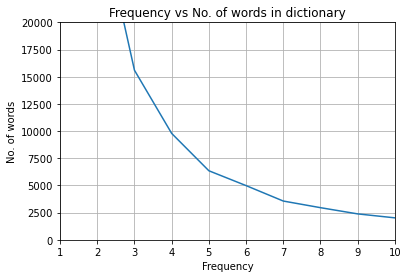

In [9]:
#Plotting Frequency vs No. of words graph.
x,y = np.unique(freq,return_counts=True)
plt.plot(x,y)
plt.axis([1,10,0,20000])
plt.xlabel('Frequency')
plt.ylabel('No. of words')
plt.title('Frequency vs No. of words in dictionary')
plt.grid()
plt.show()

In [10]:
features = v[freq>100]  #Taking words with frqeuency greater than 100 as features.
len(features) #Size of our vocabulary.

4905

In [11]:
def f(s,features,y): # Returns a list for each document with frequency of words and its class.
    c_s = cleanser(s)
    s_words = set(stopwords.words('english'))
    row = [0]*len(features)
    c_s = c_s.split()
    for word in c_s:
        if word not in s_words:
            index = np.where(features==word)[0]
            if len(index)==1:
                row[index[0]] +=1
    row.append(classes_dict[y])
    return row

In [12]:
def form_dataset(x,y,features):# Constructs a dataset with each row having frequency of words for a particular document.
    #This might take some time.
    data = []
    n1 = len(x)
    for i in range(n1):
#         if i%500==0: #Uncomment to see progress.
#             print(i,y[i])
        with open('20_newsgroups/'+y[i]+'/'+x[i],'r') as file:
            s = file.read()
            data.append(f(s,features,y[i]))
    data = np.array(data)
    return data

In [13]:
test_data = form_dataset(x_test,y_test,features)#Testing data 
train_data = form_dataset(x_train,y_train,features) #Training Data

In [14]:
x_train_1 = train_data[:,:-1]
y_train_1 = train_data[:,-1]
x_test_1 = test_data[:,:-1]
y_test_1 = test_data[:,-1]

# Inbuilt Multinomial Naive Bayes.

In [15]:
#Using sklearn's Multinomial Naive bayes
clf = MultinomialNB()
clf.fit(x_train_1,y_train_1)
y_pred = clf.predict(x_test_1)
print(confusion_matrix(y_test_1,y_pred))
print('--------------------------------------------------------------')
print(classification_report(y_test_1,y_pred))

[[207   0   0   0   1   0   1   2   0   0   0   0   1   0   0   0   0   1
    1  36]
 [  0 196   0   8  14   6  12   1   1   0   0   2   6   1   3   0   0   0
    0   0]
 [  0  42  13 118  25  28  10   1   0   0   0   0  11   1   1   0   0   0
    0   0]
 [  0   6   0 207  22   2   7   1   1   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   3   0   5 233   0   3   0   1   0   0   0   4   0   1   0   0   0
    0   0]
 [  0  23   1   5   7 208   3   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   2   4   0 237   2   0   0   0   0   3   0   0   0   1   0
    1   0]
 [  0   0   0   0   1   0   5 231   4   0   2   0   6   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   6   7 236   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1   2 234  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   2   3   4  17 220   0   0   1   1   0   0   0
    1   0]
 [  0   2   1   0   0   0   0   0   0   0   0 242   5   0   0   0

In [16]:
Ib_test_score = clf.score(x_test_1,y_test_1)
Ib_test_score

0.8326

# Implementation of Multinomial Naive Bayes

In [17]:
class NBMultinomial:
    def __init__(self):
        self.result = {}
    
    def fit(self,x_train,y_train): #Stores the total frequencies of words for every class in a dictionary.
        self.result['Total_data'] = y_train.shape[0]
        num_features = x_train.shape[1]
        class_values = set(y_train)
        for current_class in class_values:
            self.result[current_class] = {}
            x_curr = x_train[y_train==current_class]
            s = 0
            for i in range(num_features):
                wf = x_curr[:,i].sum()
                self.result[current_class][i] = wf
                s+=wf
            self.result[current_class]['total_words'] = s
            self.result[current_class]['total_docs'] = x_curr.shape[0]
            
            
    def __Probability(self,x,current_class):#Calculates the probability for the given class.
        n = x.shape[0]
        p = log(self.result[current_class]['total_docs']/self.result['Total_data'])
        for i in range(n):
            if x[i]!=0:
                num = self.result[current_class][i]+1
                denom = self.result[current_class]['total_words']+n
                p += x[i]*(log(num)-log(denom))
        return p
    
    
    def __predict_single_P(self,x):#returns the best class for a single test point.
        classes = self.result.keys()
        best_p = -100
        best_class = -1
        first_run = True
        for current_class in classes:
            if current_class  =='Total_data':
                continue
            p_current_class = self.__Probability(x,current_class)
            if (first_run) | (p_current_class>best_p):
                best_p = p_current_class
                best_class = current_class
                first_run = False
        return best_class
    
    
    def predict(self,x_test):
        #This might take some time.
        y_pred = []
        i=0
        for x in x_test:
#             if i%100==0: #Uncomment to see the progress.
#                 print(i)
            x_class  =self.__predict_single_P(x)
            y_pred.append(x_class)
            i+=1
        return y_pred
    def score(self,y_pred,y_true):
        # returns the mean accuracy
        count = 0
        n = len(y_pred)
        for i in range(n):
            if y_pred[i] == y_true[i]:
                count+=1
        return count/n

In [18]:
clf2 = NBMultinomial()
clf2.fit(x_train_1,y_train_1)
y_pred_a = clf2.predict(x_test_1)
print(confusion_matrix(y_test_1,y_pred_a))
print('------------------------------------------------')
print(classification_report(y_test_1,y_pred_a))
A_test_score = clf2.score(y_pred_a,y_test_1)

[[207   0   0   0   1   0   1   2   0   0   0   0   1   0   0   0   0   1
    1  36]
 [  0 196   0   8  14   6  12   1   1   0   0   2   6   1   3   0   0   0
    0   0]
 [  0  42  13 118  25  28  10   1   0   0   0   0  11   1   1   0   0   0
    0   0]
 [  0   6   0 207  22   2   7   1   1   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   3   0   5 233   0   3   0   1   0   0   0   4   0   1   0   0   0
    0   0]
 [  0  23   1   5   7 208   3   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   2   4   0 237   2   0   0   0   0   3   0   0   0   1   0
    1   0]
 [  0   0   0   0   1   0   5 231   4   0   2   0   6   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   6   7 236   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1   2 234  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   2   3   4  17 220   0   0   1   1   0   0   0
    1   0]
 [  0   2   1   0   0   0   0   0   0   0   0 242   5   0   0   0

# Comparison.

In [19]:
print("Score of our algorithm on test data:",A_test_score)
print("Score of sklearn's MultinomialNB on the same data :",Ib_test_score)

Score of our algorithm on test data: 0.8326
Score of sklearn's MultinomialNB on the same data : 0.8326
